In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df


,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
520,258,1,171
522,259,1,231
524,260,1,172
526,261,1,109


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,258,IPL-2011,Kolkata,22-04-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin,NaN,258,171
258,259,IPL-2011,Delhi,23-04-2011,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Delhi Daredevils,29,0,DA Warner,Feroz Shah Kotla,S Asnani,RE Koertzen,NaN,259,231
259,260,IPL-2011,Hyderabad,24-04-2011,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Mumbai Indians,37,0,SL Malinga,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,AL Hill,NaN,260,172
260,261,IPL-2011,Jaipur,24-04-2011,Kochi Tuskers Kerala,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,8,SK Warne,Sawai Mansingh Stadium,BR Doctrove,SK Tarapore,NaN,261,109


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(224, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52120,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,2,I Sharma,...,0,0,0,0,0,0,0,NaN,NaN,NaN
52121,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,3,I Sharma,...,0,0,0,0,1,0,1,NaN,NaN,NaN
52122,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,4,A Mishra,...,0,0,0,0,0,0,0,NaN,NaN,NaN
52123,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,5,A Mishra,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'])
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52120,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,2,I Sharma,...,0,0,0,0,0,NaN,NaN,130,42,4
52121,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,3,I Sharma,...,0,1,0,1,0,NaN,NaN,131,41,3
52122,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,4,A Mishra,...,0,0,0,0,0,NaN,NaN,131,41,2
52123,260,Hyderabad,Mumbai Indians,172,2,Deccan Chargers,Mumbai Indians,20,5,A Mishra,...,0,0,0,0,0,NaN,NaN,131,41,1


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int') # Make sure the column is of numeric type
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,1,206,119,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,118,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,117,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,3,204,116,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,7,200,115,5


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,1,NaN,NaN,1,206,119,9
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,118,8
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,1,NaN,NaN,1,206,117,7
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,1,NaN,NaN,3,204,116,6
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,1,NaN,NaN,7,200,115,5


In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left']) # crr = runs/overs

In [ ]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left']) # crr = runs/overs
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
delivery_df['result'] = delivery_df.apply(result,axis=1) # This line was incorrectly indented
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']] # This line was incorrectly indented
final_df = final_df.sample(final_df.shape[0])
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
13807,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,82,69,-43,129,5.529412,7.130435,0


In [ ]:
final_df.dropna(inplace=True)
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
4912,Delhi Daredevils,Sunrisers Hyderabad,Delhi,28,20,-92,185,9.420000,8.400000
15225,Kings XI Punjab,Royal Challengers Bangalore,Chandigarh,73,63,-48,143,7.368421,6.952381
19754,Delhi Daredevils,Rajasthan Royals,Mumbai,113,36,-77,192,5.642857,18.833333
23811,Royal Challengers Bangalore,Kolkata Knight Riders,Durban,14,14,-102,139,7.075472,6.000000
27658,Kings XI Punjab,Deccan Chargers,Kimberley,68,49,-63,168,8.450704,8.326531
...,...,...,...,...,...,...,...,...,...
10230,Kings XI Punjab,Delhi Daredevils,Chandigarh,128,97,-13,158,7.826087,7.917526
28900,Royal Challengers Bangalore,Kolkata Knight Riders,Centurion,51,26,-91,173,7.787234,11.769231
39150,Chennai Super Kings,Rajasthan Royals,Ahmedabad,22,7,-106,177,8.230088,18.857143
35891,Chennai Super Kings,Delhi Daredevils,Delhi,113,75,-37,185,9.600000,9.040000


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8352635782747604

In [ ]:
pipe.predict_proba(X_test)[10]

array([0.93540025, 0.06459975])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,6,79.8,20.2
10467,2,8,8,74.1,25.9
10473,3,1,6,87.2,12.8
10479,4,7,6,86.8,13.2
10485,5,12,6,78.4,21.6
10491,6,13,6,65.9,34.1
10497,7,9,6,62.8,37.2
10505,8,15,8,44.3,55.7
10511,9,7,6,47.0,53.0
10518,10,17,7,25.5,74.5


Text(0.5, 1.0, 'Target-178')

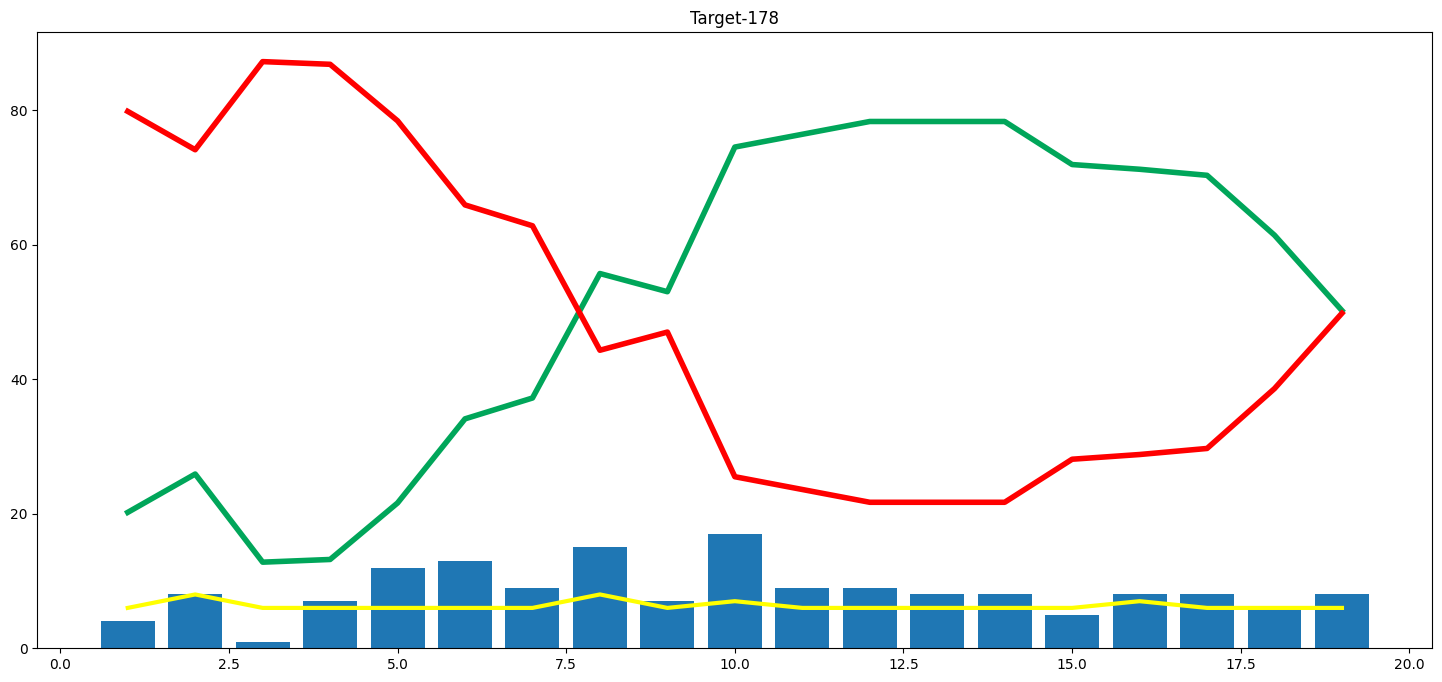

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:

teams
['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [ ]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala'],
      dtype=object)

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [68]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.8 MB/s eta 0:00:00


In [75]:
import streamlit as st
import pickle
import pandas as pd

teams = ['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

cities = ['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', 'Mohali', 'Bengaluru']

pipe = pickle.load(open('pipe.pkl','rb'))
st.title('IPL Win Predictor')

col1, col2 = st.columns(2) # Use st.columns instead of st.beta_columns

with col1:
    batting_team = st.selectbox('Select the batting team',sorted(teams))
with col2:
    bowling_team = st.selectbox('Select the bowling team',sorted(teams))

selected_city = st.selectbox('Select host city',sorted(cities))

target = st.number_input('Target')

col3,col4,col5 = st.columns(3) # Use st.columns instead of st.beta_columns

with col3:
    score = st.number_input('Score')
with col4:
    overs = st.number_input('Overs completed')
with col5:
    wickets = st.number_input('Wickets out')

if st.button('Predict Probability'):
    runs_left = target - score
    balls_left = 120 - (overs*6)
    wickets = 10 - wickets
    crr = score/overs
    rrr = (runs_left*6)/balls_left

    input_df = pd.DataFrame({'batting_team':[batting_team],'bowling_team':[bowling_team],'city':[selected_city],'runs_left':[runs_left],'balls_left':[balls_left],'wickets':[wickets],'total_runs_x':[target],'crr':[crr],'rrr':[rrr]})

    result = pipe.predict_proba(input_df)
    loss = result[0][0]
    win = result[0][1]
    st.header(batting_team + "- " + str(round(win*100)) + "%")
    st.header(bowling_team + "- " + str(round(loss*100)) + "%")